# MNIST Data Classifier

## Background
This is an example use of the custom neural network pakcage `NN` in the repository [machine-learning-projects](https://github.com/eranda-ihalagedara/machine-learning-projects/tree/main/Neural%20Network%20From%20Scratch). Before, running this notebook, make sure you have the package folder `NN` in your working directory along with the notebook.

## Dataset
MNIST dataset stands for Modified National Institute of Standards and Technology dataset. It is a large set of labelled images of handwritten digits. Each image is of 28x28 pixels of size in grayscale. It is already split in to 60000 training images and 10000 test images.

## Importing Required Libraries
This notebook uses the following additional libaries. Make sure, you have installed them in your Python environment.  

- `scikit-learn`:
  To get the dataset and one-hot encode the labels
- `numpy`:
  To make input data to be `numpy.ndarray`s and reshaping data to be compatible with the `NN` package
- `matplotlib`:
  For plotting

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
from matplotlib import pyplot as plt
import numpy as np
import NN as nn

## Prepare Dataset

### Fetch data
We can fetch the MNIST dataset with `fetch_openml` and check the data type and size.

In [2]:
mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')

X = mnist.data
y = mnist.target

In [3]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [4]:
X.shape, y.shape

((70000, 784), (70000,))

There are `70000` samples with `784` pixels in each image.

### Encode Labels  
Since this is a classification, we have to encode the labels. We will use `OneHotEncoder` of `scikit-learn` package. It gives one-hot enoded set of labels. Check out the [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) and [One-hot](https://en.wikipedia.org/wiki/One-hot)

In [5]:
encoder = OneHotEncoder(sparse_output=False)

Note that the labels, `y`, is a 1D array in shape `(70000,)`. See what happens when we try to fit labels to the encoder.

In [6]:
try:
    encoder.fit(y)
except Exception as e:
    print (e)

Expected 2D array, got 1D array instead:
array=['5' '0' '4' ... '4' '5' '6'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.


We have to make `y` a 2D array with `.reshape(-1,1)`

In [7]:
y = y.reshape(-1,1)
encoder.fit(y)

OneHotEncoder(sparse_output=False)

Now we can encode the labels with `.transform()`

In [8]:
y_enc = encoder.transform(y)
y_enc.shape

(70000, 10)

### Reshape Data
Recall, we have to reshape data such that the features are along rows and samples are along columns. Right now, each sample is in the rows. We can change this by simply transposing the `ndarray`.

In [9]:
X = X.T
y_enc = y_enc.T
X.shape, y_enc.shape

((784, 70000), (10, 70000))

## Train-Test Split
Before training the model we have to keep aside test data. This is already done in the dataset as the last 10000.

In [10]:
X_train, X_test = X[:, :60000], X[:, 60000:]
y_train, y_test = y_enc[:, :60000], y[:, 60000:]

In [11]:
X_train, X_test = X[:, :60000], X[:, 60000:]
y_train, y_test = y_enc[:, :60000], y_enc[:, 60000:]

## View Images
Before we begin training, let's view the handwritten images

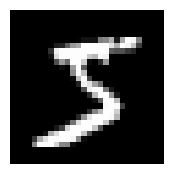

In [12]:
def plot_image(digit):
    plt.figure(figsize=(2,2))
    plt.imshow(digit.reshape((28,28)), cmap='gray')
    plt.axis('off')

plot_image(X[:,0])

In [13]:
y[0]

array(['5'], dtype=object)

## Build a Model
For MNIST classification, let's define a model with the following specifications:
- A Fully Connected layer of size 32 with `relu` activation
- Two Fully Connected layers, each of size 64 with `relu` activation
- A Softmax layer of size 10, since there are 10 different classes and one-hot encoding has produced a vector of length 10

**Important: Note that the first layer has to either define the `input_size`, which is 784 in this case, or the layer size should match the input vector number of features. Further last layer should match the label size**

We will use a learning rate of `0.001` (default is `0.0001`) and a learning rate decay of `0.99` (default is `1`)

In [14]:
model = nn.Model([
    nn.Fully_Connected(32, 'relu', input_size=784),
    nn.Fully_Connected(64, 'relu'),
    nn.Fully_Connected(64, 'relu'),
    nn.Softmax(10)
], learning_rate=0.001, lr_decay=0.99)

## Model Training

To train the model, we can use `mode.train()` as below. `cv` is for the cross-validation set which is optional. It should be tuple or list type, as input and labels. Here, the first half of the test set we put aside earlier is used for `cv`. The weights are updated using stochastic gradient descent. You can define the mini-batch size with `batch_size` argument in `train()` method. Default value is 32.

epoch: 1 ================================================== 100.00 / 100 	loss: 2.3139 	accuracy: 0.3204 
epoch: 2 ================================================== 100.00 / 100 	loss: 2.1613 	accuracy: 0.3586 
epoch: 3 ================================================== 100.00 / 100 	loss: 2.1253 	accuracy: 0.4001 
epoch: 4 ================================================== 100.00 / 100 	loss: 1.6547 	accuracy: 0.4212 
epoch: 5 ================================================== 100.00 / 100 	loss: 1.4781 	accuracy: 0.5136 
epoch: 6 ================================================== 100.00 / 100 	loss: 1.4186 	accuracy: 0.5397 
epoch: 7 ================================================== 100.00 / 100 	loss: 1.3505 	accuracy: 0.5595 
epoch: 8 ================================================== 100.00 / 100 	loss: 1.2959 	accuracy: 0.5813 
epoch: 9 ================================================== 100.00 / 100 	loss: 1.2311 	accuracy: 0.5995 
epoch: 10 ====================================

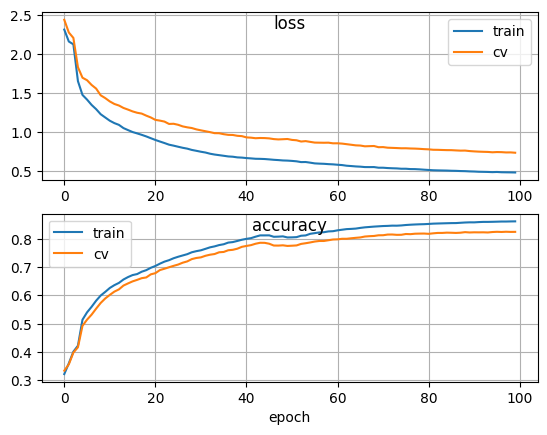

In [15]:
model.train(X_train,y_train, epochs=100, cv = (X_test[:,:5000], y_test[:,:5000]))

The default loss in using Fully Connected layers is `mean_squared_error`. If the last layer is a Sofmax, the loss defaults to `cross_entropy`.
At the end of the training, a graph is plot with loss (and accuracy if Softmax is used) in each epoch. You can also access the values using `model.metrics_list` attribute.

## Generalization Error
We can estimate the generalization error using the unseen data, i.e. test set that was not used in training.
First we predict using the test input and then compare with the labels to get the accuracy

In [16]:
pred = model.predict(X_test[:,5000:])
pred[:,:4]

array([[8.73644389e-067, 3.78473538e-004, 6.42129584e-008,
        2.53193791e-002],
       [1.17171858e-048, 4.33633657e-005, 4.23073202e-010,
        9.23363181e-003],
       [6.59517260e-027, 5.34942589e-004, 8.66442744e-008,
        3.60544925e-002],
       [1.00000000e+000, 1.70743897e-004, 5.05734026e-009,
        1.53574360e-001],
       [1.83197237e-048, 7.64554997e-002, 2.14875339e-002,
        1.29811020e-002],
       [7.67525744e-031, 3.48080827e-003, 3.65338988e-006,
        9.15572818e-002],
       [5.44358904e-221, 1.27530617e-005, 2.84416451e-011,
        8.19851972e-003],
       [1.78147359e-136, 3.71536291e-002, 2.99638118e-003,
        2.27763419e-002],
       [1.11647139e-020, 7.99599744e-003, 1.85366850e-005,
        5.86107598e-001],
       [8.68165984e-024, 8.73773789e-001, 9.75493739e-001,
        5.41972931e-002]])

Note that the predictions are Softmax probabilities for each category. We can convert them to the same as one-hot encoded pattern with the maximum value indices, convert back to labels using the `.inverse_transform()` method of OneHotEncoder and then compare values to get the accuracy. But, using the following code, we can get the test accuracy quicker.

In [17]:
test_accuracy = (np.argmax(pred, axis=0) == np.argmax(y_test[:,5000:], axis=0)).mean()
test_accuracy

0.8788

That is a little over 87% accuracy with the given model and 100 epochs. We can further improve this by tuning hyperparameters: number of layers, layer size, learning rate, mini-batch size etc.

## End Note
Feel free to try out other examples with this neural network package. Your suggestions are welcome.